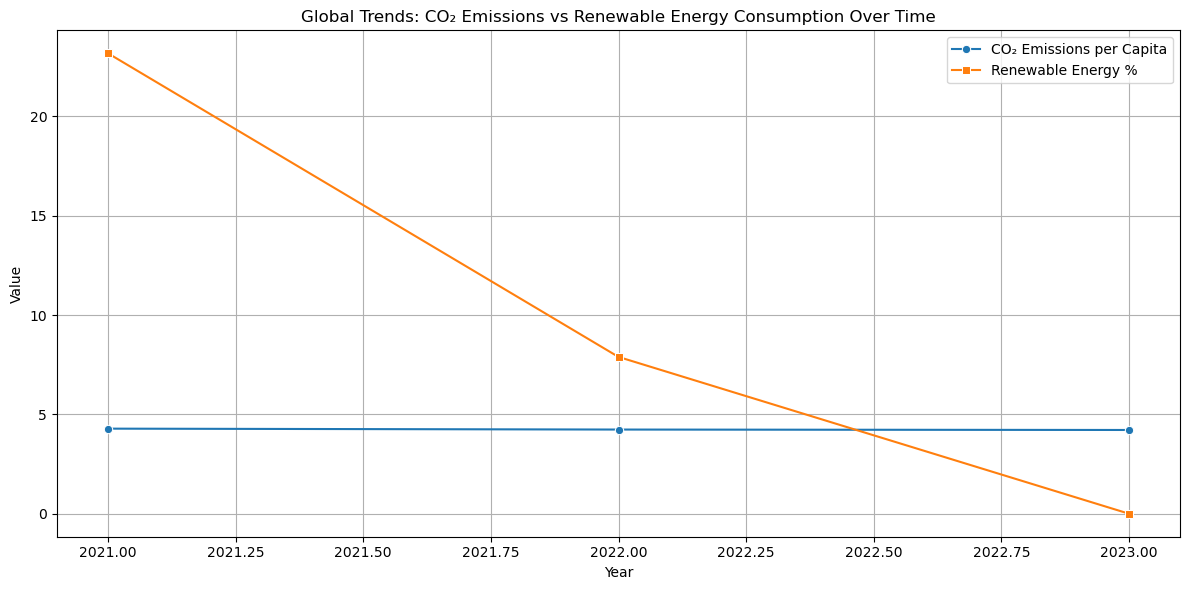

In [13]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your local database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# Query to pull yearly global average CO₂ emissions and renewable energy %
query = """
SELECT Time AS Year,
       AVG(CAST("Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" AS FLOAT)) AS CO2_per_capita,
       AVG(CAST("Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" AS FLOAT)) AS Renewable_energy_pct
FROM Environmental_Indicators
WHERE "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" IS NOT NULL


  AND "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
GROUP BY Year
ORDER BY Year
"""

# Load the data
df = pd.read_sql_query(query, conn)
conn.close()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='CO2_per_capita', label='CO₂ Emissions per Capita', marker='o')
sns.lineplot(data=df, x='Year', y='Renewable_energy_pct', label='Renewable Energy %', marker='s')
plt.title("Global Trends: CO₂ Emissions vs Renewable Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


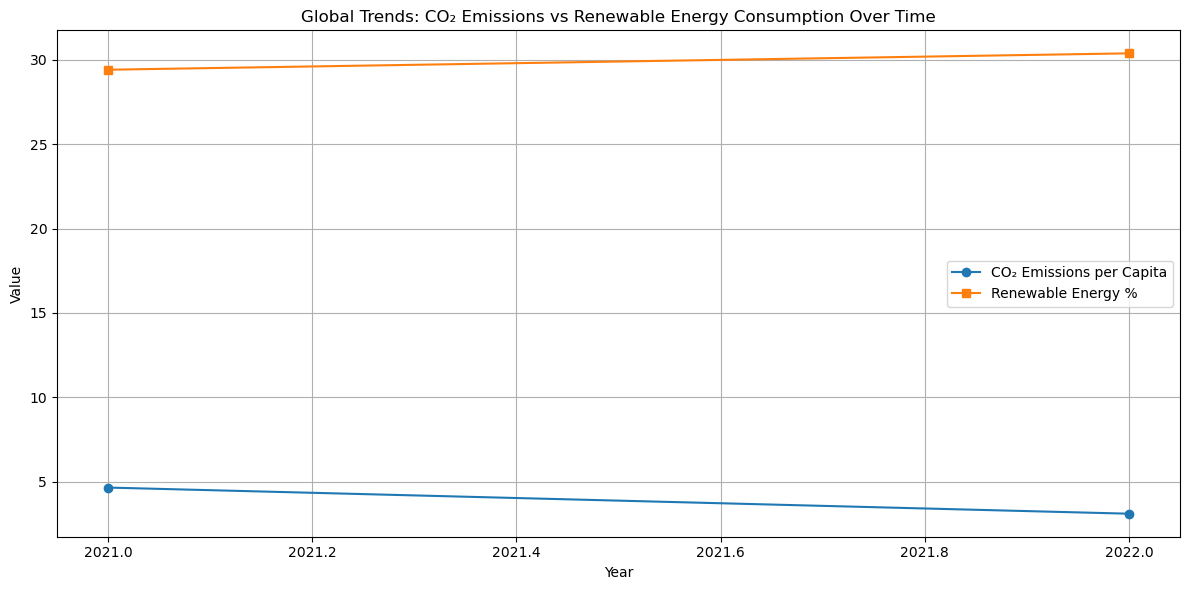

In [14]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your SQLite database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# SQL query to fetch and clean necessary data
query = """
SELECT 
    "Time" AS Year,
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" AS CO2_per_capita,
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" AS Renewable_pct
FROM Environmental_Indicators
WHERE 
    "Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita) [EN.GHG.CO2.PC.CE.AR5]" IS NOT NULL AND
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
"""

# Load data
df = pd.read_sql_query(query, conn)

# Convert columns to numeric
df['CO2_per_capita'] = pd.to_numeric(df['CO2_per_capita'], errors='coerce')
df['Renewable_pct'] = pd.to_numeric(df['Renewable_pct'], errors='coerce')
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Drop any rows with missing values
df.dropna(inplace=True)

# Group by Year and calculate average
df_grouped = df.groupby('Year').mean().reset_index()

# Plot the trends
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Year'], df_grouped['CO2_per_capita'], marker='o', label='CO₂ Emissions per Capita')
plt.plot(df_grouped['Year'], df_grouped['Renewable_pct'], marker='s', label='Renewable Energy %')
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Global Trends: CO₂ Emissions vs Renewable Energy Consumption Over Time")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Close connection
conn.close()


In [15]:
import sqlite3
import pandas as pd

# Connect to database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# SQL Query
query = """
SELECT "Country Name", 
       AVG("Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]") AS Avg_Renewable_Energy
FROM Environmental_Indicators
WHERE "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
GROUP BY "Country Name"
ORDER BY Avg_Renewable_Energy DESC
LIMIT 20;
"""

# Load data into DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Display
print(df)


                Country Name  Avg_Renewable_Energy
0                    Somalia             63.600000
1                    Liberia             62.000000
2                     Uganda             60.633333
3   Central African Republic             60.600000
4              Guinea-Bissau             58.266667
5                 Madagascar             55.566667
6                    Burundi             55.366667
7                     Bhutan             54.766667
8                     Rwanda             53.100000
9               Sierra Leone             47.566667
10              Burkina Faso             47.533333
11                      Mali             47.433333
12                      Chad             46.633333
13                    Malawi             44.666667
14                    Guinea             44.466667
15                  Eswatini             43.366667
16             Liechtenstein             36.833333
17          Papua New Guinea             36.366667
18                   Lao PDR   

C:\Users\krish\AppData\Local\Temp\ipykernel_33444\2583852514.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Avg_Renewable_Energy', y='Country Name', data=df, palette='Set2')


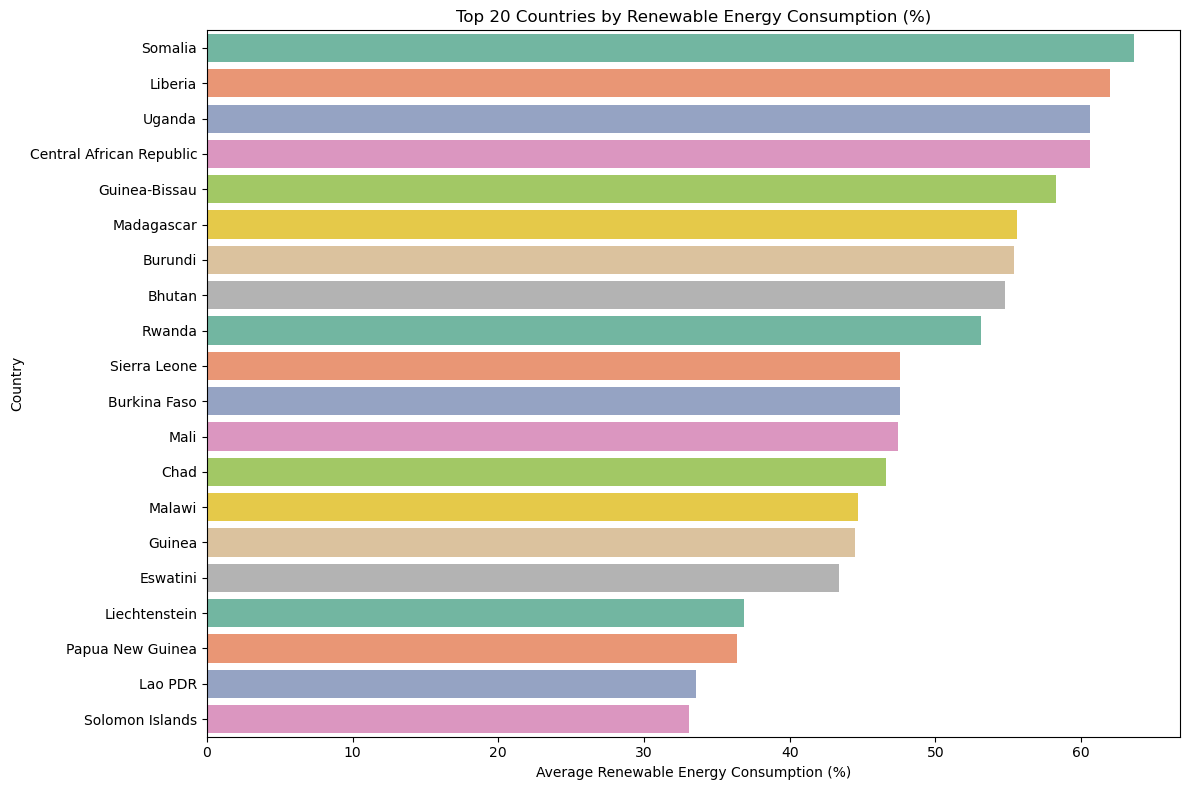

In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your SQLite database
conn = sqlite3.connect(r'C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db')

# SQL query to get top 20 renewable energy countries
query = """
SELECT "Country Name", 
       AVG("Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]") AS Avg_Renewable_Energy
FROM Environmental_Indicators
WHERE "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
GROUP BY "Country Name"
ORDER BY Avg_Renewable_Energy DESC
LIMIT 20;
"""

# Load the query result into a DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Avg_Renewable_Energy', y='Country Name', data=df, palette='Set2')
plt.xlabel('Average Renewable Energy Consumption (%)')
plt.ylabel('Country')
plt.title('Top 20 Countries by Renewable Energy Consumption (%)')
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_33444\853772269.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x='Avg_Renewable_Energy', y='Country Name', palette='crest')


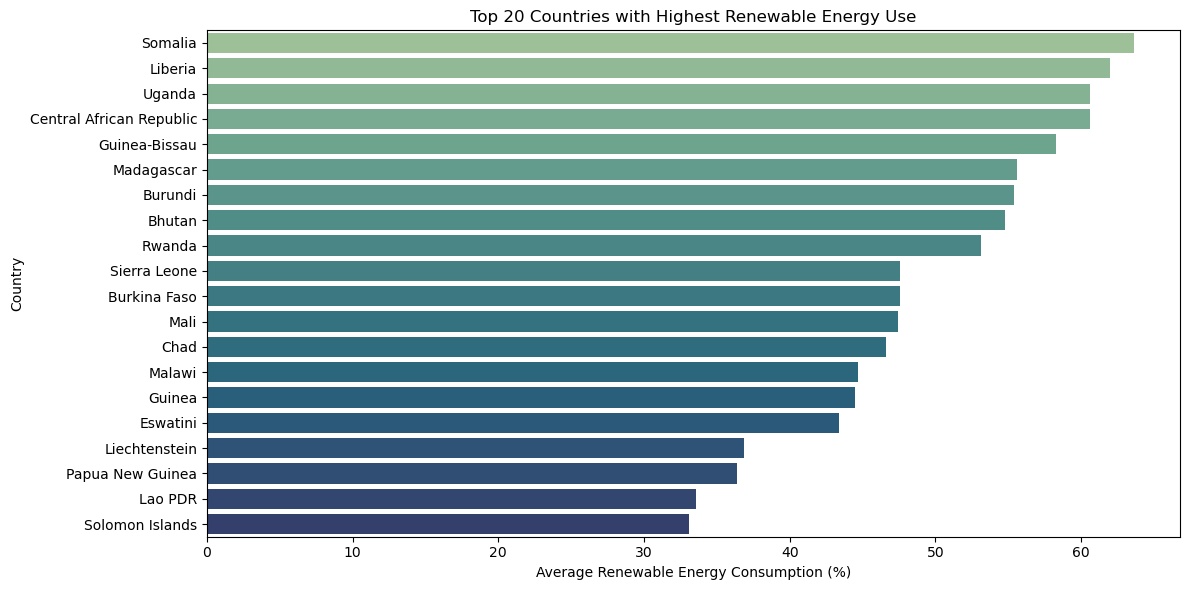

In [17]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your database
db_path = r"C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db"
conn = sqlite3.connect(db_path)

# SQL Query: Top 20 countries by average renewable energy use
query = """
SELECT 
    "Country Name", 
    AVG("Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]") AS Avg_Renewable_Energy
FROM Environmental_Indicators
WHERE "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
GROUP BY "Country Name"
ORDER BY Avg_Renewable_Energy DESC
LIMIT 20;
"""

# Load into DataFrame
df_top = pd.read_sql_query(query, conn)
conn.close()

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(data=df_top, x='Avg_Renewable_Energy', y='Country Name', palette='crest')
plt.title('Top 20 Countries with Highest Renewable Energy Use')
plt.xlabel('Average Renewable Energy Consumption (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_33444\1285390225.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='Renewable', y='Country Name', palette='flare')


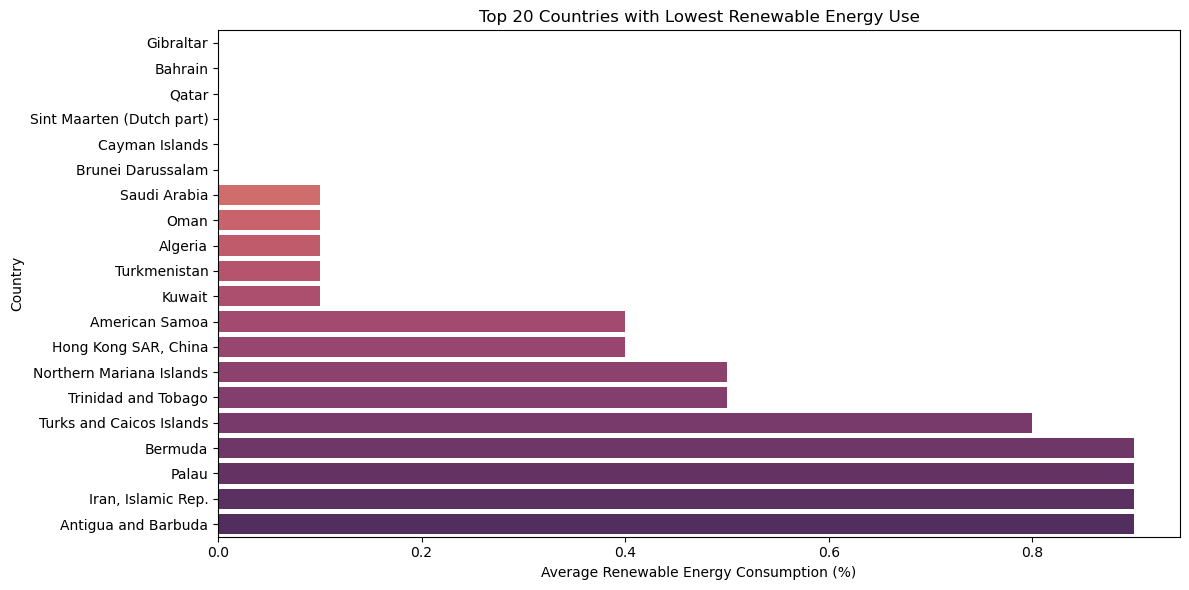

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
db_path = r"C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db"
conn = sqlite3.connect(db_path)

# Query and load data
query = """
SELECT 
    "Country Name", 
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]"
FROM Environmental_Indicators
WHERE "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Convert to numeric, remove invalid
df["Renewable"] = pd.to_numeric(df["Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]"], errors='coerce')
df = df.dropna()

# Group by Country and get bottom 20
df_grouped = df.groupby("Country Name").mean(numeric_only=True).sort_values("Renewable").head(20).reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='Renewable', y='Country Name', palette='flare')
plt.title('Top 20 Countries with Lowest Renewable Energy Use')
plt.xlabel('Average Renewable Energy Consumption (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


C:\Users\krish\AppData\Local\Temp\ipykernel_33444\3170284633.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_bottom10, x='Renewable', y='Country Name', palette='mako')


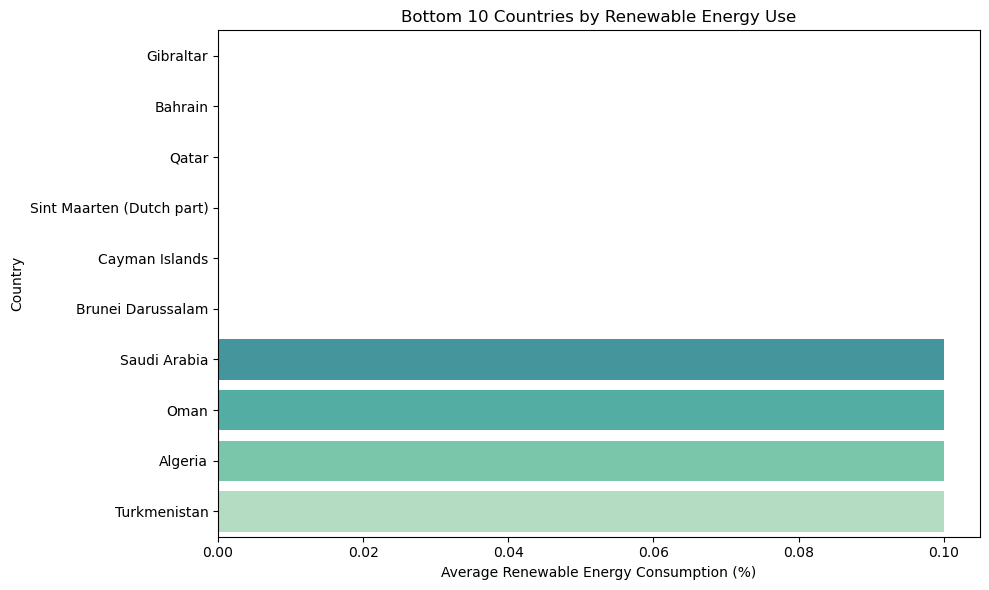

In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
db_path = r"C:\Users\krish\Desktop\CSUN KRISH MS BANA\CSUN BANA SEM 4\1. BANA 698 GRADUATE PROJECT\culminating-project-group-2\Database\team2_DB.db"
conn = sqlite3.connect(db_path)

# Query data
query = """
SELECT 
    "Country Name", 
    "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]"
FROM Environmental_Indicators
WHERE "Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]" IS NOT NULL
"""

# Load data
df = pd.read_sql_query(query, conn)
conn.close()

# Convert and clean
df["Renewable"] = pd.to_numeric(df["Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]"], errors='coerce')
df = df.dropna()

# Group and get bottom 10 countries
df_bottom10 = df.groupby("Country Name").mean(numeric_only=True).sort_values("Renewable").head(10).reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_bottom10, x='Renewable', y='Country Name', palette='mako')
plt.title('Bottom 10 Countries by Renewable Energy Use')
plt.xlabel('Average Renewable Energy Consumption (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()
